In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer, Aer
from qiskit.tools.visualization import plot_state_city, plot_histogram, plot_state_hinton

In [2]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Create a Quantum Circuit acting on the q register
circ = QuantumCircuit(q, c)

# MARK: START OF CIRCUIT

circ.h(q[1])
circ.h(q[2])
# circ.x(q[0])
# circ.h(q[0])


# MARK: Oracle generation. q[0] is oracle qubit. '11' is Sv
circ.ccx(q[2], q[1], q[0])
# circ.x(q[0])

# MARK: Conditional phase rotation
# Omitted for now

circ.cz(q[1], q[0])
circ.cz(q[2], q[0])

# MARK: Grover operator. Diffusion transform D = WRW
# W = Walsh-Hadamard transform (H gate on each qubit)
# R = Rotation matrix (controlled - z wrapped in bit-flips?)

circ.h(q[1])
circ.h(q[2])
circ.x(q[1])
circ.x(q[2])
circ.h(q[1])
circ.cx(q[2], q[1])
circ.h(q[1])
circ.x(q[2])
circ.x(q[1])
circ.h(q[1])
circ.h(q[2])

# MARK: Measure circuit
circ.measure(q[1], c[1])
circ.measure(q[2], c[2])


# MARK: END OF CIRCUIT

print(circ)

                  ┌───┐                                                      »
q_0: |0>──────────┤ X ├─■─────────────────■──────────────────────────────────»
             ┌───┐└─┬─┘ │ ┌───┐┌───┐┌───┐ │           ┌───┐             ┌───┐»
q_1: |0>─────┤ H ├──■───■─┤ H ├┤ X ├┤ H ├─┼───────────┤ X ├─────────────┤ H ├»
        ┌───┐└───┘  │     └───┘└───┘└───┘ │ ┌───┐┌───┐└─┬─┘┌───┐┌───┐┌─┐└───┘»
q_2: |0>┤ H ├───────■─────────────────────■─┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├─────»
        └───┘                               └───┘└───┘     └───┘└───┘└╥┘     »
 c_0: 0 ══════════════════════════════════════════════════════════════╬══════»
                                                                      ║      »
 c_1: 0 ══════════════════════════════════════════════════════════════╬══════»
                                                                      ║      »
 c_2: 0 ══════════════════════════════════════════════════════════════╩══════»
                                                    

[ 0.   +0.j  0.   +0.j -0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j]


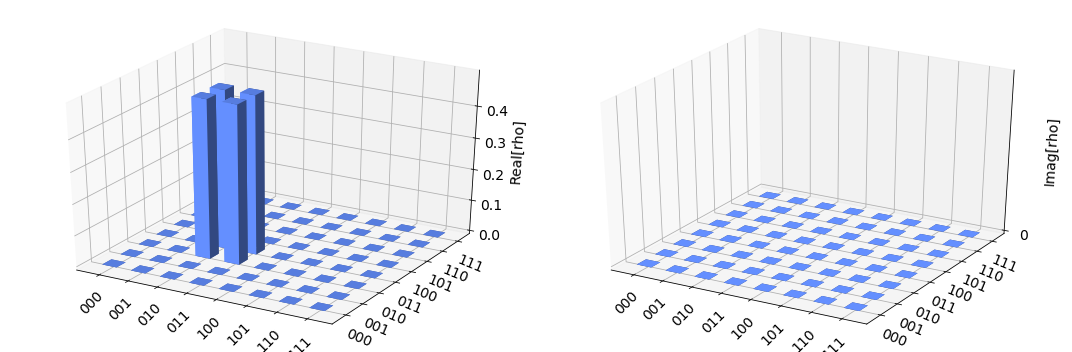

In [3]:
backend = BasicAer.get_backend('statevector_simulator')

job = execute(circ, backend)

stateVectorResult = job.result()

outputstate = stateVectorResult.get_statevector(circ, decimals=3)
print(outputstate)
plot_state_city(outputstate)
# plot_state_hinton(outputstate)

{'100': 112, '010': 132, '110': 650, '000': 130}


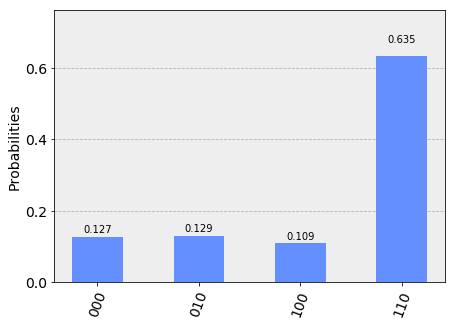

In [4]:
simulator = Aer.get_backend('qasm_simulator')
shotsResult = execute(circ, simulator).result()
counts = shotsResult.get_counts(circ)
print(counts)
plot_histogram(counts)